In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import os, glob

In [2]:
def plot_corr(data, figsize=(15,15)):
    '''
    Plot correlation 
    Args:
    - data: pd dataframe
    '''
    corr = data.corr()
    sns.set(font_scale=1.2)
    mask = np.triu(np.ones_like(corr, dtype=bool))
    with sns.axes_style("white"):
        f, ax = plt.subplots(figsize=figsize)
        ax = sns.heatmap(corr, mask=mask, square=True, 
                         vmin= -1, vmax=1,
                         cmap='RdBu_r', center=0, annot=True,
                        annot_kws={'fontsize':8})

In [3]:
data = pd.read_csv(os.path.join(os.path.dirname(os.getcwd()), '../Data/Merged_data/Survival_df.csv'),
                    index_col=0)

In [4]:
data.columns

Index(['Observed', 'F_Time', 'NDE_cycle', 'diff_two_peaks_ratio', 'amp_ratio',
       'pos_ratio', 'energy_ratio', 'NLE_ratio_51_17', 'NLE_ratio_85_17',
       'NLE_ratio_51_119', 'NLO_avg', 'Avg_RP', 'ACEE_30_Avg_58',
       'ACEE_500_Avg_58', 'ACPD_Avg_58'],
      dtype='object')

In [5]:
data_f = data.drop(['Observed'], axis=1)

### Plotting

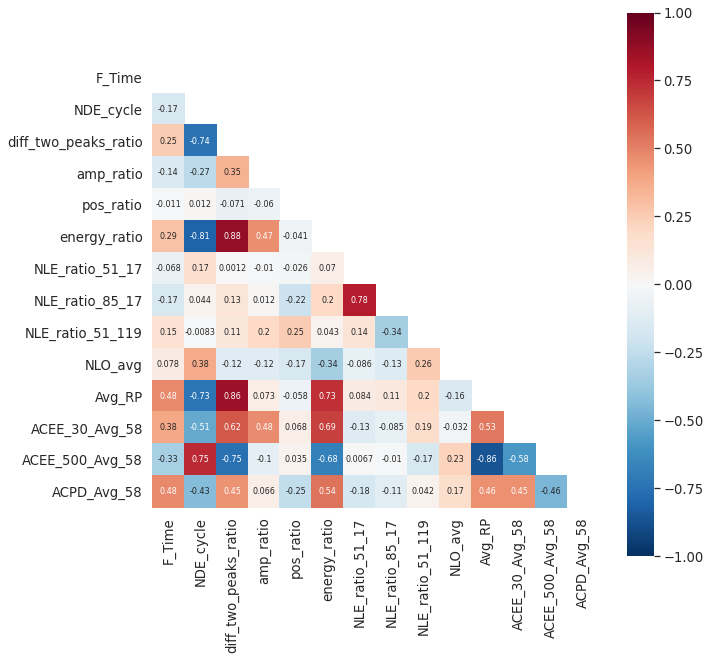

In [6]:
plot_corr(data_f, figsize=(10,10))

In [9]:
data.shape

(21, 15)

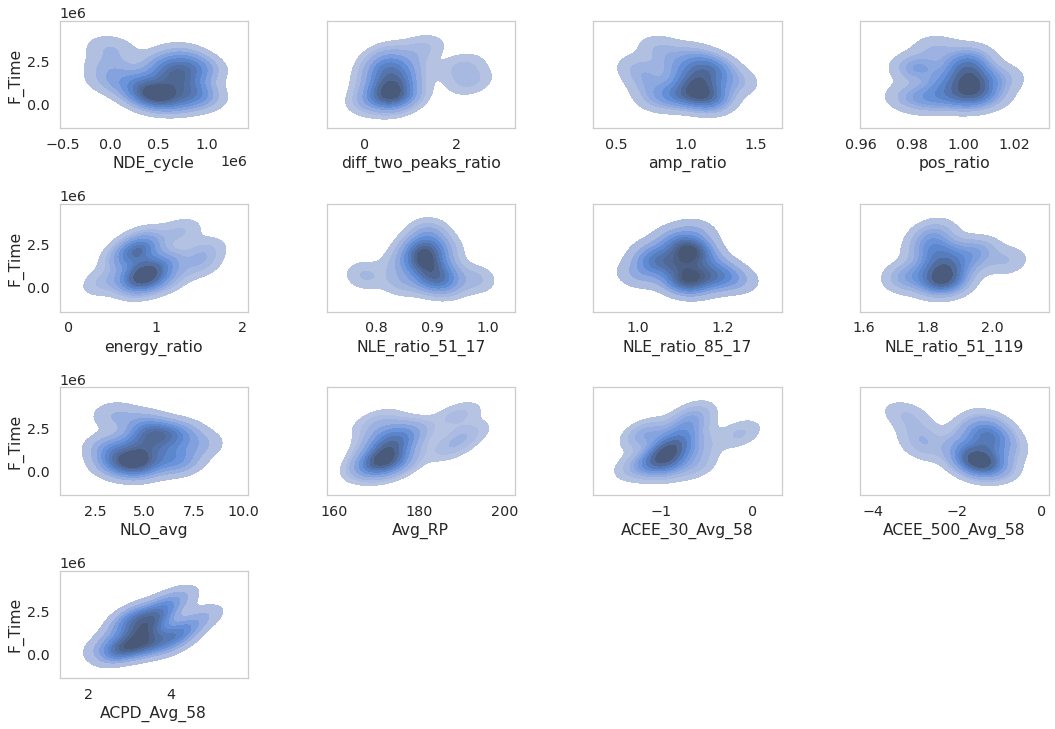

In [8]:
sns.set(font_scale=1.3)
sns.set_style("whitegrid", {'axes.grid' : False})


fig, axes = plt.subplots(4, 4,  sharex=False, sharey=True, figsize=(15,10))
plt.tight_layout(h_pad=3, w_pad=3)

for ax, col in zip(axes.flatten(), data.drop(['Observed'], axis=1).columns[1:]):
    
    sns.kdeplot(x=col, y='F_Time', data=data, fill=True, ax=ax)
fig.delaxes(axes[3,3])
fig.delaxes(axes[3,2])
fig.delaxes(axes[3,1])


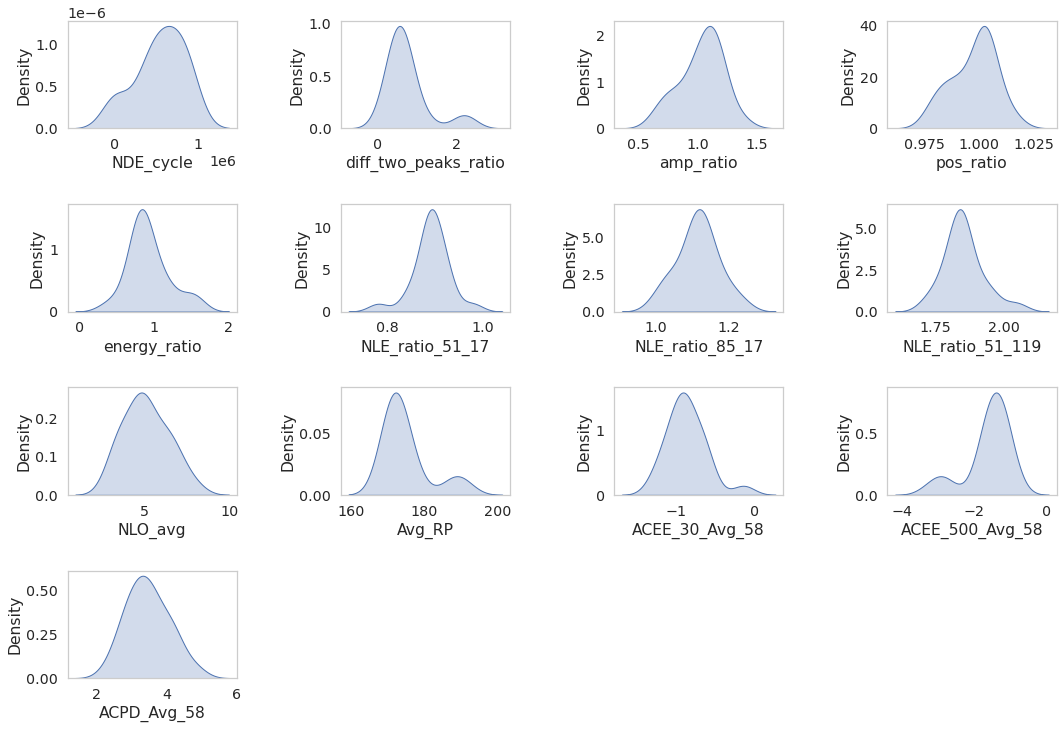

In [10]:
sns.set(font_scale=1.3)
sns.set_style("whitegrid", {'axes.grid' : False})


fig, axes = plt.subplots(4, 4,  sharex=False, sharey=False, figsize=(15,10))
plt.tight_layout(h_pad=3, w_pad=3)

for ax, col in zip(axes.flatten(), data.drop(['Observed'], axis=1).columns[1:]):
    
    sns.kdeplot(x=col, data=data, fill=True, ax=ax)
    
fig.delaxes(axes[3,3])
fig.delaxes(axes[3,2])
fig.delaxes(axes[3,1])


In [11]:
test = pd.melt(data_f, 
               id_vars=['F_Time'])

In [12]:
test.variable.unique()

array(['NDE_cycle', 'diff_two_peaks_ratio', 'amp_ratio', 'pos_ratio',
       'energy_ratio', 'NLE_ratio_51_17', 'NLE_ratio_85_17',
       'NLE_ratio_51_119', 'NLO_avg', 'Avg_RP', 'ACEE_30_Avg_58',
       'ACEE_500_Avg_58', 'ACPD_Avg_58'], dtype=object)

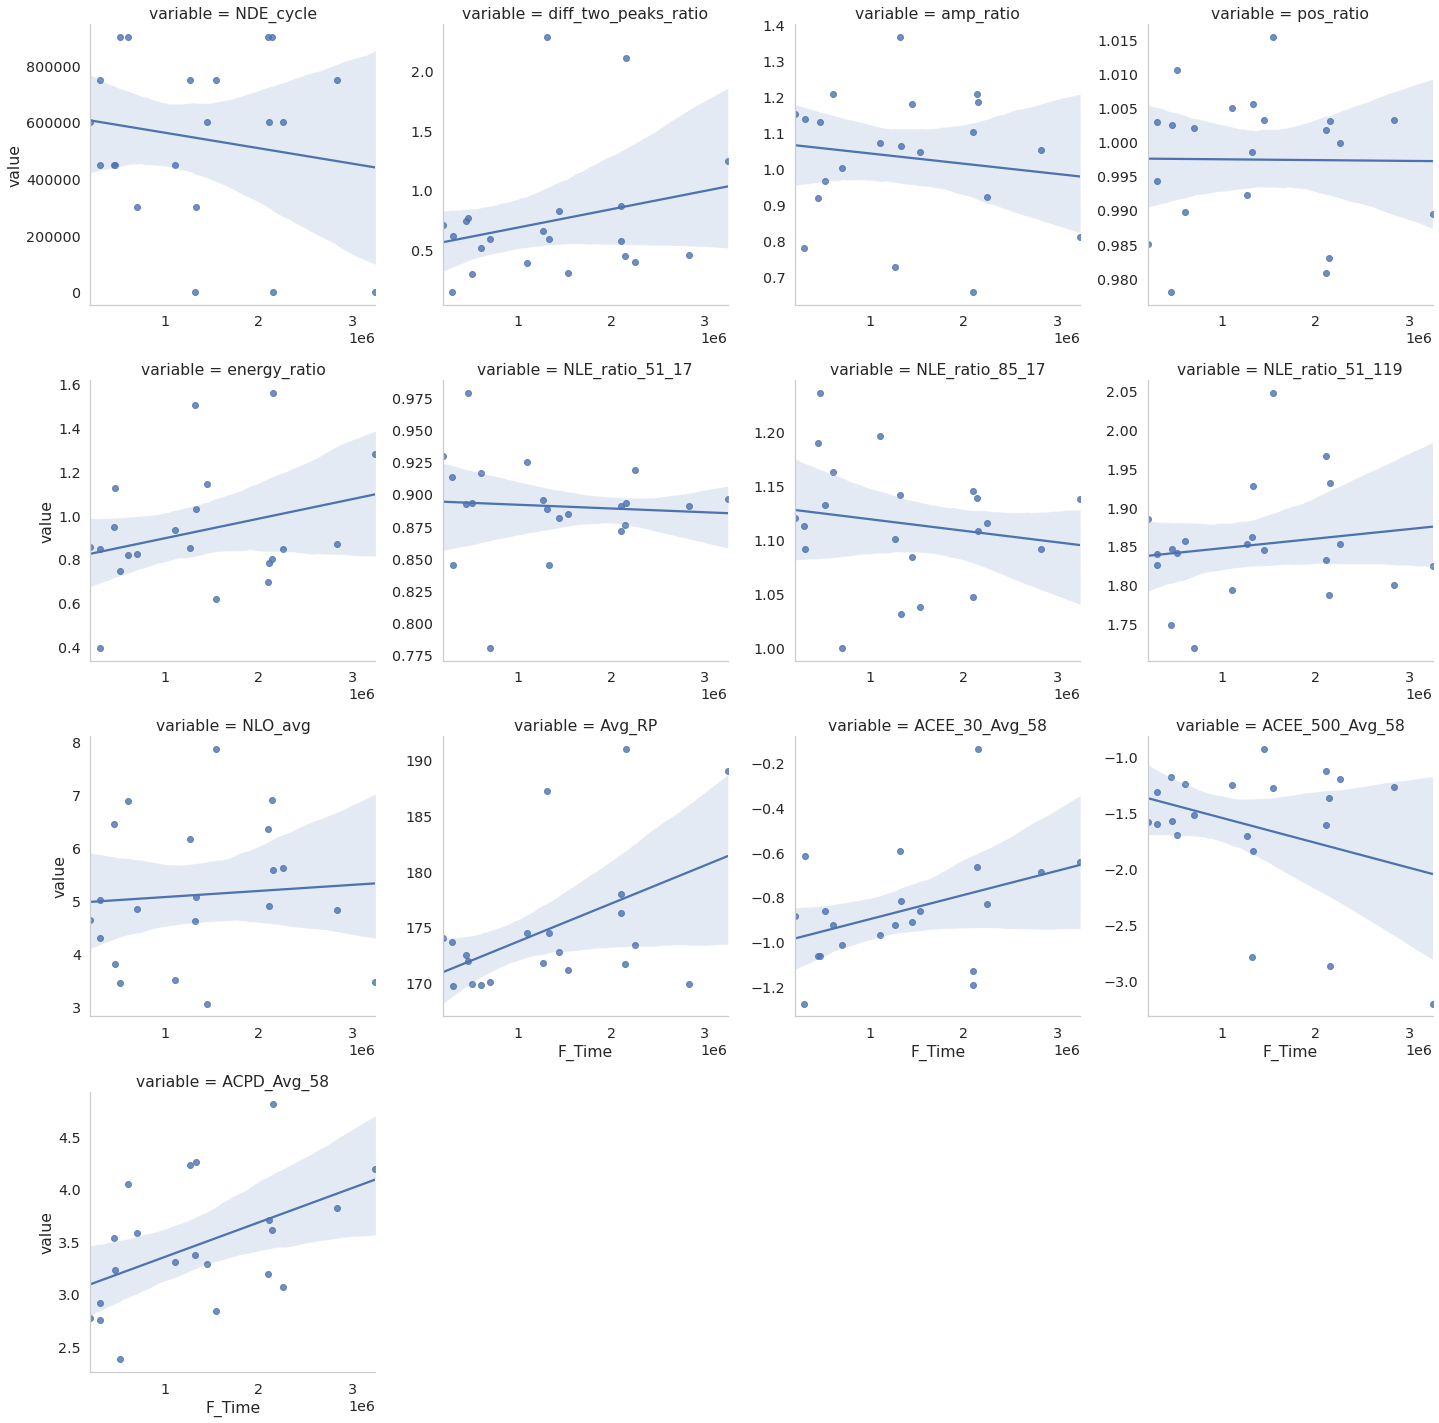

In [13]:
sns.lmplot(x='F_Time', y='value', data=test, 
           col='variable', col_wrap=4,
           sharey=False, sharex=False)